In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

In [2]:
def f2(x): #this gives the position of the lightparticle when moving up and down at time x
    return(abs(abs(x%1-0.5)-0.5))  #light moves up and down. takes 1 timeunit to move up and down once

In [3]:
def functiontosolve(lam,tau,x,y,v_vector): #this function needs to be 0 for the particle to meet the observer at time tau

    x = np.array([lam[0],x[0],x[1],x[2]])   #position of particle
    o = np.array([tau,y[0],y[1],y[2]])      #position of observer
    xP = LorentzBoost(v_vector,x)     #position of lightparticle in observer frame

    s = np.subtract(xP,o)             #difference of observer and lightparicle 

    d = np.linalg.norm(s[1:])          #distance between lightparticle and observer

    return(d+xP[0]-tau)                 #return the value that should be zero,
                                         #when this is zero the light of the object hits the observer at time tau

In [39]:
def functiontosolveclock(lam,tau,y,v_vector): #this function needs to be 0 for the particle to meet the observer at time tau
                                                #works for the lightclock moving up and down
    x = np.array([lam[0],0,0,f2(lam)[0]])#position of lightparticle in the clock
    o = np.array([tau,y[0],y[1],y[2]])      #position of observer
    xP = LorentzBoost(v_vector,x)     #position of lightüparticle in observer frame

    s = np.subtract(xP,o)             #difference of observer and lightparicle 

    d = np.linalg.norm(s[1:])          #distance between lightparticle and observer

    return(d+xP[0]-tau)                 #return the value that should be zero,
                                         #when this is zero the light of the object hits the observer at time tau

In [40]:
def LorentzBoost(v_vector,co_vector): #boosts the vector co_vector with the speed v_vector

        v_x = v_vector[0]
        v_y = v_vector[1]
        v_z = v_vector[2]
        

        v = np.sqrt(v_x**2 + v_y**2 + v_z**2)

        c = 1 #c := 100% the speed of light

        gamma = 1/np.sqrt(1-(v**2/c**2))

        B = np.array([[gamma, ((-gamma*v_x)/c), ((-gamma*v_y)/c), ((-gamma*v_z)/c)],
                      [((-gamma*v_x)/c), (1 + ((gamma-1)*(((v_x**2))/v**2))), ((gamma-1)*((v_x*v_y)/v**2)), ((gamma-1)*((v_x*v_z)/v**2))],
                      [((-gamma*v_y)/c), ((gamma-1)*((v_y*v_x)/v**2)), (1 + ((gamma-1)*(((v_y**2))/v**2))) , ((gamma-1)*((v_y*v_z)/v**2))],
                      [((-gamma*v_z)/c), ((gamma-1)*((v_z*v_x)/v**2)), ((gamma-1)*((v_z*v_y)/v**2)), (1 + ((gamma-1)*(((v_z**2))/v**2)))]])

        return np.matmul(B, co_vector)

In [41]:
def TransformClock(y,v_vector,tau): #v_vector: speed of moving frame relative to observer, tau: time at observer
  
    lam = fsolve(functiontosolveclock,x0=tau,args=(tau,y,v_vector))  #x0 besser als tau wählen oder noch besseren guess abgeben

    x = np.array([lam[0],0,0,f2(lam[0])]) #lightparticle at time lambda in the moving  frame
    xP = LorentzBoost(v_vector,x) #boost it back to observer frame

    #print(f"lambda = {lam1}; x = {x}; xP = {xP}")

    return xP

In [46]:
def Transform(x,y,v_vector,tau):     #x: Position of Object in its frame, y, position of observer
                                        #v_vector: speed of moving frame relative to observer, tau: time at observer
    lam = fsolve(functiontosolve,x0=tau,args=(tau,x,y,v_vector))  #x0 besser als tau wählen oder noch besseren guess abgeben

    x = np.array([lam[0],x[0],x[1],x[2]]) #lightparticle at time lambda in the moving  frame
    xP = LorentzBoost(v_vector,x) #boost it back to observer frame

    #print(f"lambda = {lam[0]}; x = {x}; xP = {xP}")

    return xP

print(Transform(np.array([0,0,0]),np.array([0,10,0]),np.array([0.2,0,0]),0))

[-10.20620726   2.04124145   0.           0.        ]


In [8]:
def vlength(x): # x := vector with [x1,x2,x3,..,xn] 
    
    vint = 0
    
    for n in range(0,len(x)):
        vint += x[n]**2
    
    vlen = np.sqrt(vint)
    
    return vlen

print(vlength(np.array([4,4,4,4])))
#np.linalg.norm

8.0


In [9]:
def relativespeedconversion(v):
    nrs = []
    c = 3*10**8
    for n in range(0, len(v)):
        nrs.append(v[n]*c)
    return nrs

In [47]:
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0,0.2,0]) #set up relative speed

In [48]:
def vectorbetweenXO(x,o): # x := [x1,x2,x3,x4] object vector; o := is [o1,o2,o3,o4] observer vector
    xo = np.subtract(x,o)
    
    return xo

In [49]:
def thetaCalc(xo,v): # xo := [xo1,xo2,xo3,xo4] being the vector between observer and emitter; v := velocity of the emitter
    theta = np.arccos((np.dot(xo,v))/(vlength(xo)*vlength(v)))
    
    #print(np.dot(xo,v),(vlength(xo)*vlength(v)))
    
    return theta

xo = vectorbetweenXO(np.array([1,1,1]),Observer)
print(xo)



print(thetaCalc(xo,relativespeedconversion(relativespeed)))

print(thetaCalc(np.array([100,0,0]),np.array([1,1,0]))/2/np.pi*360)


[ 1 -9  1]
2.9857322758832203
45.00000000000001


In [50]:
def frequency_received(theta_r,f_s,v_s):# received frequency
    c = 3*10**8 # rough estimate for the speed of light
    beta = v_s / c #beta notation used in galilean as well as in lorentz transformations
    gamma = 1 / np.sqrt((1 - beta**2))
    
    
    f_r = f_s / (gamma*(1 + beta*np.cos(theta_r)))
    
    return f_r

xo = vectorbetweenXO(np.array([1,1,1]),Observer)
v_s = vlength(relativespeedconversion(relativespeed))
print(v_s,frequency_received(thetaCalc(xo,relativespeed),f_s,v_s))

60000000.0 1221044599493291.2


In [51]:
wavelength = lambda f : c / f #compute wavelength

In [52]:
frequency = lambda w: c/w

In [53]:
def waveToRGB(wave):
    gamma = 0.8
    intensity_max = 1
    
    if wave < 380:
        red, green, blue = 1,1,1
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = - (wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0 ,0
    else:
        red, green, blue = 1,1,1
    
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
    
    def f(c):
        if c == 1:
            return 1
        else:
            return intensity_max * pow(c * factor, gamma)
    
    return f(red), f(green), f(blue)

In [54]:
def realPerspectiveShapes(x,o): # Assume that our plane is vertical and inifinite at the intersection y = 5
    output=np.zeros((len(x),3))
    for i in np.arange(len(x)):
        
        s1 = x[i][0] + ((5-x[i][1])/(o[1]-x[i][1]))*(o[0]-x[i][0])
        s2 = 5
        s3 = x[i][2] + ((5-x[i][1])/(o[1]-x[i][1]))*(o[2]-x[i][2])
    
        s = np.array([s1,s2,s3])
        output[i,:] = s
    
    return output

In [55]:
def realPerspectiveMI(x,o):
    
    s1 = x[0] + ((5-x[1])/(o[1]-x[1]))*(o[0]-x[0])
    s2 = 5
    s3 = x[2] + ((5-x[1])/(o[1]-x[1]))*(o[2]-x[2])

    s = np.array([s1,s2,s3])
    
    
    return s

In [65]:
import matplotlib.pyplot as plt
col=300*10**-9
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0.2,0,0]) #set up relative speed
f_s=frequency(col)
f_r=frequency_received(thetaCalc(xo,relativespeed),f_s,v_s)

def colorTransform(col,xo,v_s): # Transforms wavelength to the relative wavelength and transforms into RGB Value
    
    f_s = frequency(col)
    f_r=frequency_received(thetaCalc(xo,relativespeed),f_s,v_s)
    
    newcol = waveToRGB(wavelength(f_r)*10**9)
    
    return newcol

<IPython.core.display.Javascript object>


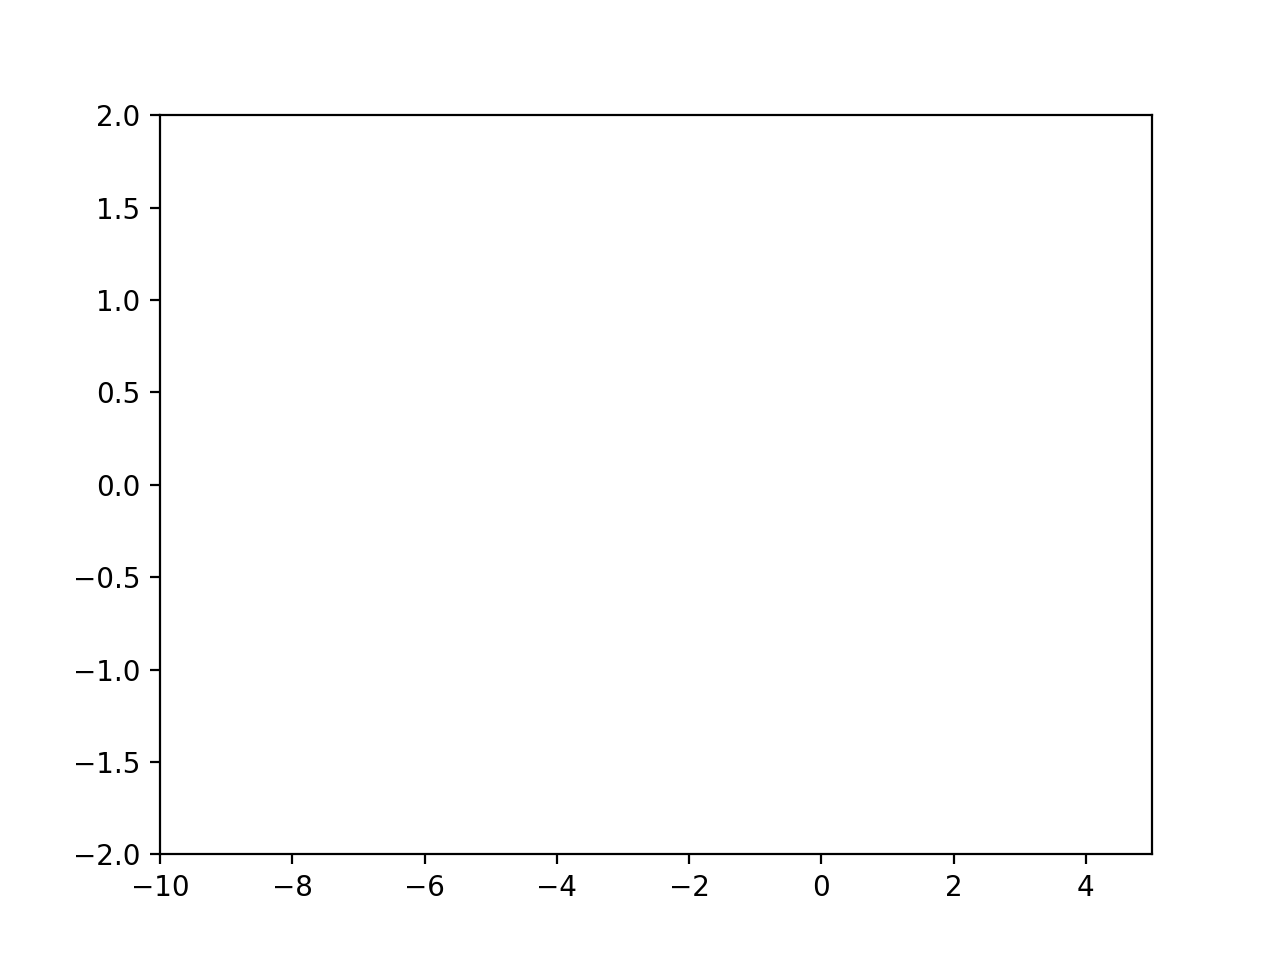

In [67]:
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

col=300*10**-9
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0.2,0,0]) #set up relative speed
f_s=frequency(col)

fig, ax = plt.subplots()

line, = ax.plot([],[],'.')
line2, = ax.plot([],[],'.')
line3, = ax.plot([],[],'.')
line4, = ax.plot([],[],'.')
line1, = ax.plot([],[],'.')
line21, = ax.plot([],[],'.')
line31, = ax.plot([],[],'.')
line41, = ax.plot([],[],'.')

ax.set_xlim(-10,5)
ax.set_ylim(-2, 2)



def animate(ntau):
    #ntau=2+ntau/100
    
    p1position=Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1:]
    p2position=Transform(np.array([0,0,1]),Observer,relativespeed,ntau)[1:]
    p3position=Transform(np.array([0,1,1]),Observer,relativespeed,ntau)[1:]
    p4position=Transform(np.array([0,1,0]),Observer,relativespeed,ntau)[1:]
    p11position=Transform(np.array([-1,0,0]),Observer,relativespeed,ntau)[1:] #1 := indicating that it is indeed behind point n = {1,4} since it is a square
    p21position=Transform(np.array([-1,0,1]),Observer,relativespeed,ntau)[1:]
    p31position=Transform(np.array([-1,1,1]),Observer,relativespeed,ntau)[1:]
    p41position=Transform(np.array([-1,1,0]),Observer,relativespeed,ntau)[1:]
    
    #x1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1] #Transform bottom of the clock (0,0,0)
    #y1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0)
    #x2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[1] #Transform top of the clock (0,0,0.5)
    #y2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0.5)
    #x3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[1] #actually y := z
    #y3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[3]
    #x4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[1]
    #y4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[3]
    lightx_data = TransformClock(Observer,relativespeed,ntau)[1] #Transform light in the clock
    lighty_data = TransformClock(Observer,relativespeed,ntau)[3] #Transform light in the clock
    
    o = Observer
    p1o = vectorbetweenXO(p1position,o)
    p2o = vectorbetweenXO(p2position,o)
    p3o = vectorbetweenXO(p3position,o)
    p4o = vectorbetweenXO(p4position,o)
    p11o = vectorbetweenXO(p11position,o)
    p21o = vectorbetweenXO(p21position,o)
    p31o = vectorbetweenXO(p31position,o)
    p41o = vectorbetweenXO(p41position,o)
    v_s = vlength(relativespeedconversion(relativespeed))
    
    line.set_data([realPerspectiveMI(p1position,o)[0]], [realPerspectiveMI(p1position,o)[2]]) #update clock top and bottom
    line.set_color(colorTransform(col,p1o,-v_s))
    
    line2.set_data([realPerspectiveMI(p2position,o)[0]], [realPerspectiveMI(p2position,o)[2]])
    line2.set_color(colorTransform(col,p2o,-v_s))
 
    line3.set_data([realPerspectiveMI(p3position,o)[0]], [realPerspectiveMI(p3position,o)[2]])
    line3.set_color(colorTransform(col,p3o,-v_s))
    
    line4.set_data([realPerspectiveMI(p4position,o)[0]], [realPerspectiveMI(p4position,o)[2]])
    line4.set_color(colorTransform(col,p4o,-v_s))
    
    line1.set_data([realPerspectiveMI(p11position,o)[0]], [realPerspectiveMI(p11position,o)[2]])
    line1.set_color(colorTransform(col,p11o,-v_s))
    
    line21.set_data([realPerspectiveMI(p21position,o)[0]], [realPerspectiveMI(p21position,o)[2]])
    line21.set_color(colorTransform(col,p21o,-v_s))
    
    line31.set_data([realPerspectiveMI(p31position,o)[0]], [realPerspectiveMI(p31position,o)[2]])
    line31.set_color(colorTransform(col,p31o,-v_s))
    
    line41.set_data([realPerspectiveMI(p41position,o)[0]], [realPerspectiveMI(p41position,o)[2]])
    line41.set_color(colorTransform(col,p41o,-v_s))
    
    
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=100)

plt.show()

In [29]:
# import the math module to use the sin and cos functions
import math

# define the function
def get_sphere_coordinates(radius, center_x, center_y, center_z):
  # create an empty list to store the coordinates
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []

    num = 10
  # calculate the coordinates for a full sphere by iterating over
  # a range of angles from 0 to 2 * pi radians for theta and phi
    for theta in np.arange(0, math.pi, 0.7):
        for phi in np.arange(0, 2 * math.pi, 0.6):
      # calculate the x, y, and z coordinates using the formula
      # x = center_x + radius * sin(phi) * cos(theta)
      # y = center_y + radius * sin(phi) * sin(theta)
      # z = center_z + radius * cos(phi)
            x = center_x + radius * math.sin(phi) * math.cos(theta)
            y = center_y + radius * math.sin(phi) * math.sin(theta)
            z = center_z + radius * math.cos(phi)
      
      # add the coordinates to the list
            x_coordinates.append(x)
            y_coordinates.append(y)
            z_coordinates.append(z)
  
  # return the list of coordinates
    return x_coordinates,y_coordinates,z_coordinates

# example usage
sphere_coordinates = get_sphere_coordinates(1, 1, 3, 4)
print(sphere_coordinates)


([1.0, 1.5646424733950353, 1.9320390859672263, 1.9738476308781951, 1.675463180551151, 1.1411200080598671, 0.5574795567051479, 0.1284242275864118, 0.0038353911641593186, 0.2272355124440123, 0.7205845018010741, 1.0, 1.4318623843851825, 1.7128628131458088, 1.744839752082696, 1.5166227364428797, 1.1079345356341135, 0.6615416962322639, 0.3333820798430237, 0.23809128168259874, 0.40895711908190147, 0.7862912391963485, 1.0, 1.0959706679630796, 1.1584160205132017, 1.1655220994405353, 1.1148065469325887, 1.0239857645759947, 0.9247860645782259, 0.8518607561417917, 0.830684747577836, 0.8686554279153399, 0.9525085460890811, 1.0, 0.7149424468148879, 0.5294636981146345, 0.5083568170773436, 0.6589950444981214, 0.9287561136498756, 1.223404722003208, 1.4400116335666115, 1.5029098223110147, 1.3901271413157452, 1.141061825830556, 1.0, 0.46798124707678923, 0.1218119508252834, 0.08241900577931949, 0.3635635009855981, 0.867033575690652, 1.4169526478750076, 1.8212181643536247, 1.9386085494285838, 1.7281159642

In [30]:
a=np.zeros((3,8))
print(a[0,:])

[0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:

def positionTransform(array_x, array_y,array_z,o,v,ntau):
    pnposition = []

    for i in range(0, len(array_x)):
        pnposition.append(Transform(np.array([array_x[i],array_y[i],array_z[i]]),o,v,ntau)[1:])

    return pnposition
ntau = np.linspace(0,10,100)
#print(positionTransform(np.array([1,1]),np.array([1,0]),np.array([1,0]),Observer,relativespeed,100))
print(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau)[0][0])
#print(realPerspective(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau),Observer))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

<IPython.core.display.Javascript object>


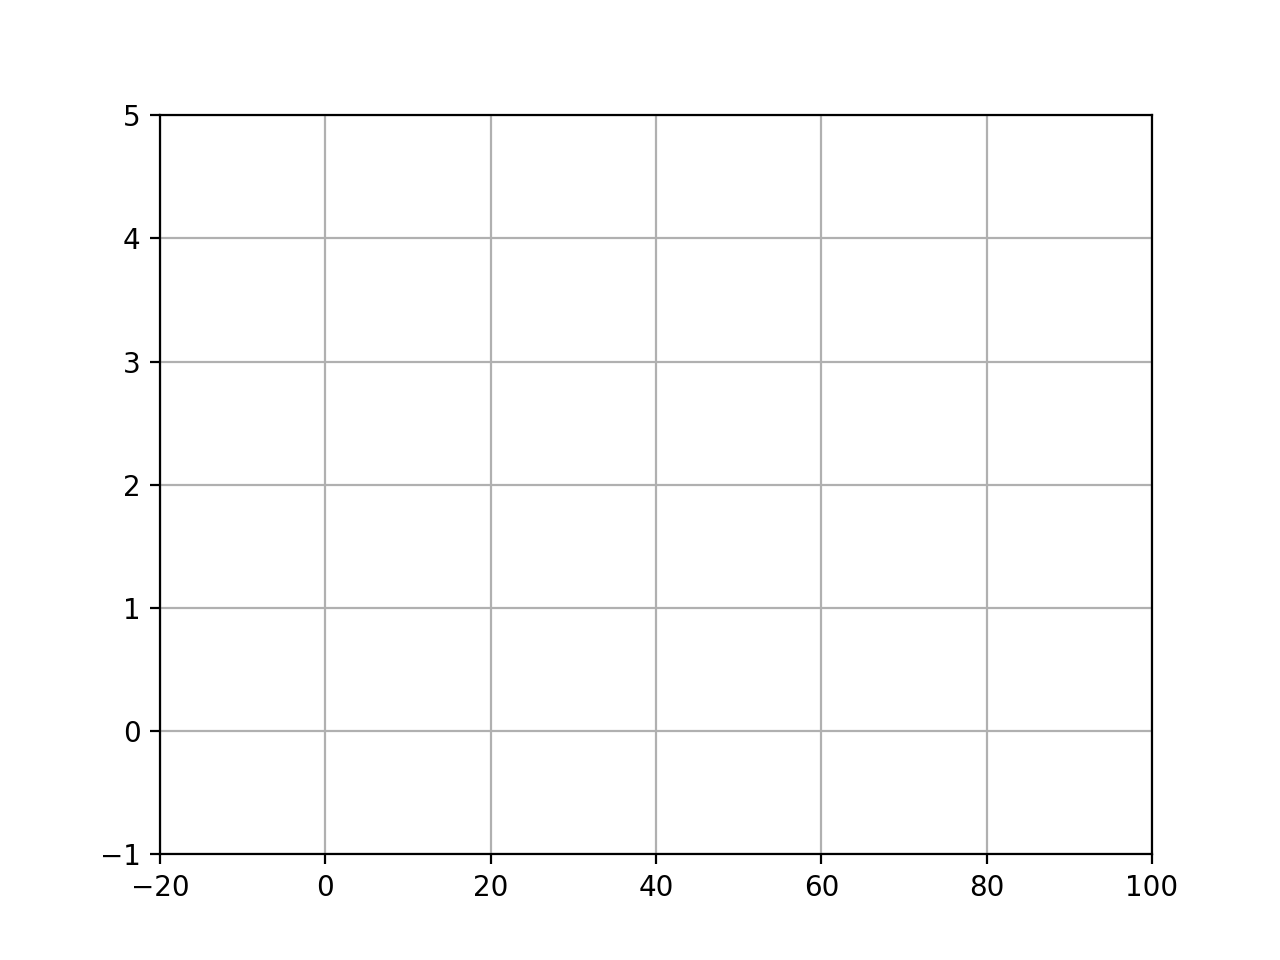

In [27]:
import matplotlib.pyplot as plt
# assuming that a square is traveling
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook
    
fig, ax = plt.subplots()

line, = ax.plot([],[],'.')

ax.set_xlim(-20,100)
ax.set_ylim(-1, 5)



def animate(ntau):
    pnposition = positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau)
    print(f"{ntau}: {pnposition}")
    
    o = Observer
    
    
    line.set_data(realPerspective(pnposition,o)[:,0],realPerspective(pnposition,o)[:,2]) #[:,0] x and z: column 0
    line.set_color()
    

    
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=100)
plt.grid()
plt.show()

In [ ]:
print(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau))

: 

<IPython.core.display.Javascript object>


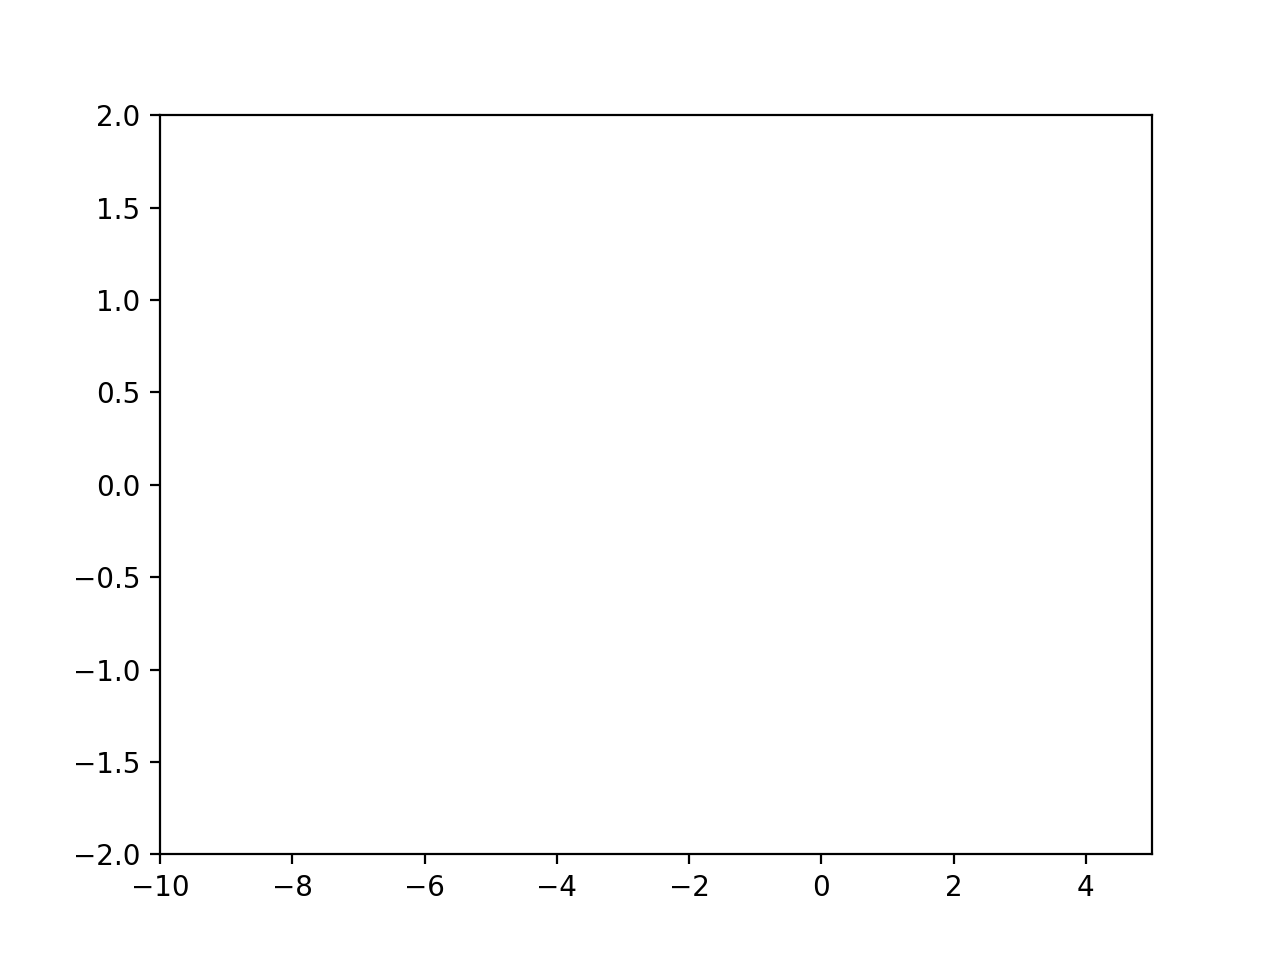

In [64]:
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

col=400*10**-9
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0,0.2,0]) #set up relative speed
f_s=frequency(col)

fig, ax = plt.subplots()

line, = ax.plot([],[],'.')
line2, = ax.plot([],[],'.')
line3, = ax.plot([],[],'.')
line4, = ax.plot([],[],'.')
line1, = ax.plot([],[],'.')
line21, = ax.plot([],[],'.')
line31, = ax.plot([],[],'.')
line41, = ax.plot([],[],'.')

ax.set_xlim(-10,5)
ax.set_ylim(-2, 2)



def animate(ntau):
    #ntau=2+ntau/100
    
    p1position=Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1:]
    p2position=Transform(np.array([0,0,1]),Observer,relativespeed,ntau)[1:]
    p3position=Transform(np.array([0,1,1]),Observer,relativespeed,ntau)[1:]
    p4position=Transform(np.array([0,1,0]),Observer,relativespeed,ntau)[1:]
    p11position=Transform(np.array([-1,0,0]),Observer,relativespeed,ntau)[1:] #1 := indicating that it is indeed behind point n = {1,4} since it is a square
    p21position=Transform(np.array([-1,0,1]),Observer,relativespeed,ntau)[1:]
    p31position=Transform(np.array([-1,1,1]),Observer,relativespeed,ntau)[1:]
    p41position=Transform(np.array([-1,1,0]),Observer,relativespeed,ntau)[1:]
    
    #x1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1] #Transform bottom of the clock (0,0,0)
    #y1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0)
    #x2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[1] #Transform top of the clock (0,0,0.5)
    #y2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0.5)
    #x3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[1] #actually y := z
    #y3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[3]
    #x4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[1]
    #y4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[3]
    lightx_data = TransformClock(Observer,relativespeed,ntau)[1] #Transform light in the clock
    lighty_data = TransformClock(Observer,relativespeed,ntau)[3] #Transform light in the clock
    
    o = Observer
    p1o = vectorbetweenXO(p1position,o)
    p2o = vectorbetweenXO(p2position,o)
    p3o = vectorbetweenXO(p3position,o)
    p4o = vectorbetweenXO(p4position,o)
    p11o = vectorbetweenXO(p11position,o)
    p21o = vectorbetweenXO(p21position,o)
    p31o = vectorbetweenXO(p31position,o)
    p41o = vectorbetweenXO(p41position,o)
    v_s = vlength(relativespeedconversion(relativespeed))
    
    line.set_data([realPerspectiveMI(p1position,o)[0]], [realPerspectiveMI(p1position,o)[2]]) #update clock top and bottom
    line.set_color(colorTransform(col,p1o,-v_s))
    
    line2.set_data([realPerspectiveMI(p2position,o)[0]], [realPerspectiveMI(p2position,o)[2]])
    line2.set_color(colorTransform(col,p2o,-v_s))
 
    line3.set_data([realPerspectiveMI(p3position,o)[0]], [realPerspectiveMI(p3position,o)[2]])
    line3.set_color(colorTransform(col,p3o,-v_s))
    
    line4.set_data([realPerspectiveMI(p4position,o)[0]], [realPerspectiveMI(p4position,o)[2]])
    line4.set_color(colorTransform(col,p4o,-v_s))
    
    line1.set_data([realPerspectiveMI(p11position,o)[0]], [realPerspectiveMI(p11position,o)[2]])
    line1.set_color(colorTransform(col,p11o,-v_s))
    
    line21.set_data([realPerspectiveMI(p21position,o)[0]], [realPerspectiveMI(p21position,o)[2]])
    line21.set_color(colorTransform(col,p21o,-v_s))
    
    line31.set_data([realPerspectiveMI(p31position,o)[0]], [realPerspectiveMI(p31position,o)[2]])
    line31.set_color(colorTransform(col,p31o,-v_s))
    
    line41.set_data([realPerspectiveMI(p41position,o)[0]], [realPerspectiveMI(p41position,o)[2]])
    line41.set_color(colorTransform(col,p41o,-v_s))
    
    
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=100)

plt.show()